In [1]:
import pandas as pd
import numpy as np
import csv 
import string
import nltk 
import re 
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import sys
import warnings
from os import path
import ast
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.linear_model import RidgeClassifierCV

from sklearn import tree
#from graphviz import Digraph
#from graphviz import Source

pd.options.display.max_seq_items = 2000
pd.options.display.max_colwidth = 90
pd.options.display.max_rows = 999

loggingFile = './visits/datax/TitleBody3GramTFIDF.txt'
binaryBodyTitle = './visits/datax/binaryBodyTitle.csv'
template = './visits/datax/dfTeste.csv'

#tfIDFoutputFile = './experiment/tfIDFoutputFile'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#termFrequencyTop50 = './experiment/termFrequencyTop50'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  
#confusionMatrix = './experiment/CM'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)

tfIDFoutputFile = './visits/datax/tfIDFConferencexCMT.csv'
#classifierFeatureInput='./experiment/train_file_test'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
termFrequencyTop50 = './visits/datax/termFrequencyTop50'+'.csv'
#predictions_result = './experiment/predict_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#probabilities_result = './experiment/probability_file_'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#modelMatrix = './experiment/modelMatrix'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'
#metrics_by_class = './experiment/metrics_By_Class'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+'.csv'  

test_type = "DecisionTree"
#test_type = "LogisticRegression"
#test_typeList = ["RandomForest","DecisionTree","LogisticRegression","MLPClassifier","MLkNN"]

predictions_result = './visits/datax/predict_file_'+'.csv'
probabilities_result = './visits/datax/probability_file_'+'.csv'
modelMatrix = './visits/datax/modelMatrix'+'.csv'
metrics_by_class = './visits/datax/metrics_By_Class'+'.csv'  
confusionMatrix = './visits/datax/CM'+'.csv'

configurationTFIDF = '(1,1)'
num_feature = 25
stop_word = 'Yes'
size_test = 0.2
splits = 10

In [2]:
data_classesConf = pd.read_csv('./visits/data/visits_Conference.owl_class_501.csv', header = 0, sep=",")
orderConf = pd.read_csv('./visits/data/visits_Order_Conference.owl_class_501.csv', header = 0, sep=",")
antConf = pd.read_csv('./visits/data/visits_ant_Conference.owl_class_501.csv', header = 0, sep=",")
data_classesCMT = pd.read_csv('./visits/data/visits_CMT.owl_class_501.csv', header = 0, sep=",")
orderCMT = pd.read_csv('./visits/data/visits_Order_CMT.owl_class_501.csv', header = 0, sep=",")
antCMT = pd.read_csv('./visits/data/visits_ant_CMT.owl_class_501.csv', header = 0, sep=",")


In [3]:
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

In [4]:
merged = cartesian_product_basic(data_classesConf,data_classesCMT)


In [5]:
merged["uniquepaths"] = merged["uniquepaths_x"] + merged["uniquepaths_y"]

In [6]:
merged["match"] = merged["nodeNumber_x"].astype(str) + merged["nodeNumber_y"].astype(str)

In [7]:
#TF-ID
def run_tf_idf(data, configurationTFIDF, num_feature, tfIDFoutputFile):
    #we need to text max_feature with 10, 20, 25, 50 
    #, max_features=num_feature
    vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range = configurationTFIDF, max_features=num_feature)
        
    tf_idf_results = vectorizer.fit_transform(data['uniquepaths'])

    features = vectorizer.get_feature_names()

    print(features)

    scores = (tf_idf_results.toarray())
    output_tf_idf = pd.DataFrame(scores)
    
    output_tf_idf = pd.concat([data['match'], output_tf_idf], axis=1)

    output_tf_idf.to_csv(tfIDFoutputFile, encoding='utf-8', header=False, index=False, sep=',')


    # remove words occuring less than 5 times
    #tfidf = TfidfVectorizer(min_df=5)
    #you can also remove common words:

    # remove words occuring in more than half the documents
    #tfidf = TfidfVectorizer(max_df=0.5)
    #you can also remove stopwords like this:
    

In [8]:
run_tf_idf(merged, (1,1), 25, tfIDFoutputFile)

['abstract', 'accepted_contribution', 'administrator', 'associatedchair', 'author', 'authornotreviewer', 'camera_ready_contribution', 'chair', 'conferencechair', 'early_paid_applicant', 'extended_abstract', 'late_paid_applicant', 'meta', 'owl', 'paper', 'paperabstract', 'paperfullversion', 'programcommitteechair', 'programcommitteemember', 'regular_contribution', 'rejected_contribution', 'review', 'reviewed_contribution', 'reviewer', 'thing']


In [9]:
#analyzing frequency of TOP 50 terms

def analyze_top(data, termFrequencyTop50):
    docs = data['uniquepaths'].tolist()

    cv = CountVectorizer()
    cv_fit=cv.fit_transform(docs)

    #print(cv.get_feature_names())
    #print(cv_fit.toarray())

    word_list = cv.get_feature_names()   

    count_list = cv_fit.toarray().sum(axis=0)
    term_frequency = dict(zip(word_list,count_list))

    a = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True) 

    top50 = a[:100]
    df_frequency = pd.DataFrame(top50, columns =['term', 'frequency'])  

    print(df_frequency)

    df_frequency.to_csv(termFrequencyTop50, encoding='utf-8', header=False, index=False, sep=',')

    sns.set(font_scale = 2)
    plt.figure(figsize=(18,17))
    plt.xticks(rotation=90)
    plt.title("Frequency of terms ")
    plt.ylabel('term', fontsize=20)
    plt.xlabel('frequency', fontsize=20)
    ax = sns.barplot(x="frequency", y="term", data=df_frequency)
    
    return docs


                              term  frequency
0                         reviewer        656
1                            paper        519
2                             meta        472
3                 paperfullversion        413
4                           author        368
5                           review        361
6                    paperabstract        354
7                authornotreviewer        295
8                              owl        236
9            programcommitteechair        236
10                           thing        236
11       camera_ready_contribution        231
12                        abstract        198
13           accepted_contribution        198
14                           chair        198
15           rejected_contribution        198
16                   administrator        177
17                 associatedchair        177
18                 conferencechair        177
19          programcommitteemember        177
20            early_paid_applicant

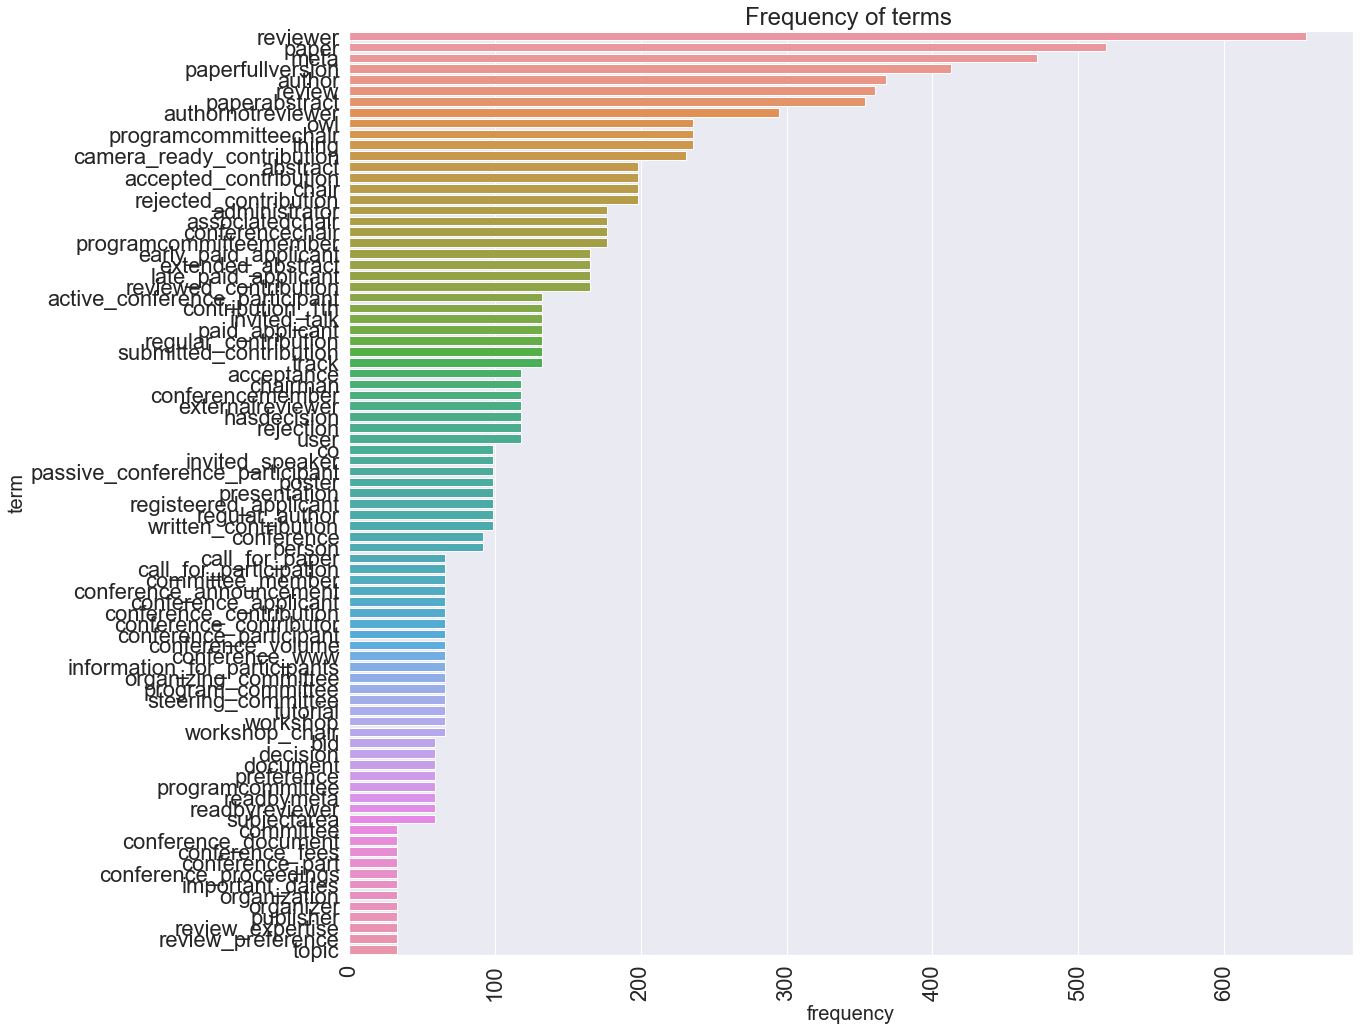

In [10]:
docs = analyze_top(merged, termFrequencyTop50)

In [11]:
#merging features TF-IDF with data_frame
def merging(data_test1, tfIDFoutputFile):
    feature = pd.read_csv(tfIDFoutputFile, header=None, sep=",")
    feature.rename(columns={0: 'match'}, inplace=True)
    
    #labels = pd.read_csv('./visits/data/visits_bin_Conference.owl_class_501.csv', sep=",")

    #data_classifier = data_test1.join(labels, lsuffix='nodeNumber', rsuffix='nodeNumber')
    #data_classifier2 = data_classifier.join(feature, lsuffix='nodeNumber', rsuffix='nodeNumber')
    data_classifier = data_test1.join(feature, lsuffix='match', rsuffix='match')
    #data_classifier2 = data_classifier.join(labels, lsuffix='nodeNumber', rsuffix='nodeNumber')
    #data_classifier2.to_csv('./visits/datax/confBinary.csv', encoding='utf-8', index=False, sep=',')

    categories = data_classifier.columns.values.tolist()
    
    return data_classifier, categories

In [12]:
data_classifier, categories = merging(merged, tfIDFoutputFile)

In [13]:
data_classifier.to_csv('./visits/datax/classifier.csv', encoding='utf-8', sep=',')


In [14]:
# create manually column ref where 1 = reference alignment and NaN otherwise and rename as classifier_ref.csv 

In [15]:
data_classifier_ref = pd.read_csv('./visits/datax/classifier_ref.csv', sep=",")


In [16]:
data_classifier_ref['ref'] = data_classifier_ref['ref'].fillna(0)

In [17]:
def eval_metrics(predictions, probabilities, y_test):
    
    y_pred = predictions.values
    y_proba = probabilities.values

    #receiving the y_test true value from each pull request
    y_true = y_test.to_numpy()

    print("Accuracy Score")
    acc_ml = accuracy_score(y_true, y_pred)
    print(acc_ml)

    print("---------")
    print("")

    print("Accuracy Score not normalized")
    acc_score = accuracy_score(y_true, y_pred, normalize=False)
    print(acc_score)

    print("---------")
    print("")

    print("zero_one_loss")
    zeroOne = zero_one_loss(y_true, y_pred)
    print(zeroOne)

    print("---------")
    print("")

    print("Fmeasure Score")
    fmeasure_score = f1_score(y_true,y_pred, average='micro')
    #fmeasure_score = f1_score(y_true,y_pred, average='macro')
    print(fmeasure_score)

    print("---------")
    print("")

    #AUC-PR
    #print("AUC-PR")
    #pr_score = average_precision_score(y_true,y_proba,average='micro')
    #print(pr_score)
    #pr_score = average_precision_score(y_true,y_proba,average='macro')

    print("---------")
    print("")


    print("hamming loss average")
    hamming_loss = skm.hamming_loss(y_true, y_pred)
    print(hamming_loss)

    print("---------")
    print("")

    #print("Jaccard samples")
    #jaccard_score_samples = jaccard_score(y_true, y_pred, average='samples')
    #print(jaccard_score_samples)

    print("---------")
    print("")


    #print("Jaccard macro")
    #jaccard_macro = jaccard_score(y_true, y_pred, average='micro')
    #print(jaccard_macro)
    #jaccard_score(y_true, y_pred, average=None)

    print("---------")
    print("")

    #return y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro
    return y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, hamming_loss


In [18]:
def plot_classes(probability, y_true, y_test):
    precision = dict()
    recall = dict()
    average_precision = dict()

    #n_classes = y_test.shape[1]

    #for i in range(n_classes):
        #precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], probability[:, i])
        #average_precision[i] = average_precision_score(y_true[:, i], probability[:, i])

    precision[0], recall[0], _ = precision_recall_curve(y_true, probability[:,0])
    average_precision[0] = average_precision_score(y_true, probability[:,0])
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),probability[:,0].ravel())

    average_precision["micro"] = average_precision_score(y_true, probability[:,0], average="micro")

    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

    plt.figure()
    plt.step(recall['micro'], precision['micro'], where='post')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))


In [19]:
#plot_classes(probability, y_true, y_test)

In [20]:
import io
def confusion_matrix(y_true, y_pred, confusionMatrix, i):

    data = multilabel_confusion_matrix(y_true, y_pred)
    
    #labels = ['Google Common', 'Test', 'SO', 'IO', 'UI', 'Network',
   #           'Security', 'OpenOffice Documents', 'Database','PDF',
    #          'Logging','Latex']
    serie = data_classifier2.iloc[0:0,6:64]
    cols = serie.columns.values

    labels = cols.tolist()
      
    metrics = pd.DataFrame()
    line = []
    dataLine = ""
    dataLine = "Label, TN, FP, FN, TP"
    line.append((dataLine))

    for j in range (0,12):
        print(j)
        row = data[j]
        dataLine=""
        dataLine = labels[j] 
        print(dataLine)
        for x in np.nditer(row):
            dataLine = dataLine + "," + str(x)
            print(dataLine)
        line.append((dataLine))
        print(line)
        
        metrics = pd.DataFrame(line)
    
    metrics.to_csv(confusionMatrix + str(i) +'.csv' , encoding='utf-8', header=True, index=False , sep=',')
    

In [21]:
#build the model 

def build_model(test_type):

    if test_type == "DecisionTree":
        #clf = BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense = [False, True])
        #clf = ClassifierChain(classifier=DecisionTreeClassifier(), require_dense = [False, True])
        clf = tree.DecisionTreeClassifier()
    if test_type == "LogisticRegression":
        clf = BinaryRelevance(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
        #clf = ClassifierChain(classifier=LogisticRegression(random_state=0), require_dense = [False, True])
    if test_type == "RandomForest": 
        clf = BinaryRelevance(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
        #clf = ClassifierChain(classifier=RandomForestClassifier(criterion='entropy',max_depth= 50, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 50), require_dense = [False, True])
    if test_type == "MLPClassifier":
        clf = BinaryRelevance(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
        #clf = ClassifierChain(classifier=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1), require_dense = [False, True])
    if test_type == "MLkNN":
        clf = BinaryRelevance(MLkNN(k=3))
        #clf = ClassifierChain(classifier=MLkNN(k=3))

    #This three works without probability
    if test_type == "LinearSVC":
        clf = BinaryRelevance(classifier=LinearSVC(), require_dense = [False, True])
    if test_type == "GaussianNB":
        clf = BinaryRelevance(classifier=GaussianNB(), require_dense = [False, True])
    if test_type == "RidgeClassifierCV":
        clf = BinaryRelevance(classifier=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]), require_dense = [False, True]) 
    if test_type == "BRkNNaClassifier":
        clf = BinaryRelevance(BRkNNaClassifier(k=3))

        
    return clf

In [22]:
def save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type):

    line=[] 
    # line to csv report file
    
    #names = ['Google Common',
#'Test',
#'SO',
##'IO',
#'UI',
#'Network',
#'Security',
#'OpenOffice Documents',
#'Database',
#'PDF',
#'Logging',
#'Latex']
    
    #serie = data_classifier2.iloc[0:0,6:64]
    #cols = serie.columns.values

    #names = cols.tolist()

    

    prec, rec, fscore, sup = precision_recall_fscore_support(y_true,y_pred, average='micro')


    arr = [acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro,prec,rec, fscore]
    columns = ['Accuracy','Acc-Score','zero_one_loss','AUC-PR','hamming loss average','Jaccard samples','Jaccard macro','Precision','Recall','Fmeasure']
  
    df_metrics2 = pd.DataFrame([arr],columns=columns)
    print(df_metrics2)

    print("---------")
    print("")

    x = precision_recall_fscore_support(y_true,y_pred, average=None)
    print("")
    print("")

    #df_metrics_by_class = pd.DataFrame.from_records(x, columns=names, index=['precision','recall','f-measure','samples_tested'])
    #print(df_metrics_by_class)

    #print("---------")
    #print("")

    df_metrics2.to_csv(modelMatrix, encoding='utf-8', header=True, index=False, sep=',')    

    #df_metrics_by_class.to_csv(metrics_by_class, encoding='utf-8', header=True, index=False, sep=',')    

    dataLine = ""
    dataLine = "tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i"
    line.append((dataLine))
    dataLine =  str(configurationTFIDF) + "," + str(num_feature) + "," + stop_word + "," + str(size_test) + "," + str(test_type) + "," + str(acc_ml) + ","+ str(acc_score) + ","+ str(zeroOne) + "," + str(pr_score) + ","+ str(hamming_loss) + ","+ str(jaccard_score_samples) + ","+ str(jaccard_macro)+"," + str(prec)+","+str(rec)+","+str(fscore)+","+str(i) 
    line.append((dataLine))
    print(line)

    metrics = pd.DataFrame(line)
    #metrics.to_csv('./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    #np.savetxt(r'./experiment/report'+ str(configurationTFIDF) + str(num_feature) + stop_word + str(size_test)+ str(test_type)+str(i)+'.txt', metrics.values, fmt='%s', delimiter=',')
    metrics.to_csv('./visits/datax/report'+str(i)+'.csv', encoding='utf-8', header=False, index=False, sep=',')    
    np.savetxt(r'./visits/datax/report'+str(i)+'.txt', metrics.values, fmt='%s', delimiter=',')

    return prec, rec, fscore, sup

In [23]:
#i=1
#prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)
#prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,0,hamming_loss,0,0, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)


In [24]:
import datetime

def persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           jaccard_macro , prec , rec, fscore, i):
    now = datetime.datetime.now()

    templateData = pd.read_csv(template, sep=',')
    
    print ("Current date and time : ")
    print (now.strftime("%Y-%m-%d %H:%M:%S"))
    headerdf = ['date_time','tf-IDF', '#_TopTerms','Stop_Word','Train/Test_Size','Algorithm','Accuracy_Score',
                'Accuracy_Score_not_normalized','zero_one_loss', 'AUC-PR','hamming_loss_avg','Jaccard_samples',
                'Jaccard_macro','Precision','Recall','Fmeasure_Score','i']


    tup = ( now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i))

    print("tupla:", tup)
    print(len(tup))

    list_tup  = [ now,str(configurationTFIDF) ,str(num_feature) , stop_word , str(size_test) , str(test_type) , str(acc_ml) , 
           str(acc_score) , str(zeroOne) , str(pr_score) , str(hamming_loss) , str(jaccard_score_samples) , 
           str(jaccard_macro) , str(prec) , str(rec) , str(fscore) ,str(i)]


    dfTeste = pd.DataFrame.from_records(data=[tup], columns=[headerdf])

    data_list = templateData.values.tolist()
    data_list.append(list_tup)
    new_data = pd.DataFrame(data_list)  
    for row in templateData.itertuples():
        print(row)

    #new_data.to_csv('./experiment/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  
    new_data.to_csv('./visits/datax/dfTeste.csv', encoding='utf-8', index=False, sep=',', header=headerdf)  
    

In [25]:
from graphviz import Digraph
from graphviz import Source
def plot_tree(clf_tree,X_dataset):
    with open('tree.dot','w') as td:
        g = tree.export_graphviz(clf_tree, 
                                 out_file=td,
                                 feature_names=X_dataset.columns,
                                 class_names=["N","S"],
                                 filled=True,
                                 rounded=True)
        

    with open('tree.dot','r') as td:
        src = Source(td.read())

    return src
    
    

ModuleNotFoundError: No module named 'graphviz'

In [26]:
#plot_tree(clf,X_train)

In [27]:
def run_split(data_classifier2, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test):
    train = []
    test = []

    X = data_classifier2
    data_classifier2.to_csv('./visits/datax/data_classifier2.csv', encoding='utf-8', sep=',') 
    rs = ShuffleSplit(n_splits=splits, test_size= size_test, random_state=52)
    rs.get_n_splits(X)

    for train_index, test_index in rs.split(X):
         #print("%s %s" % (train_index, test_index))
         train.append(train_index)
         test.append(test_index)
        
    for i in range(0, len(train)):
 
        size_features = len(X.columns)
        #data = data_classifier.ix[train[i]] #df.iloc[:, 'col_header']
        #data = data_classifier.isin[train[i]]
        #X_train = data.iloc[train[1],1:size_features]
        #del X_train['issueNumberissueNumber']
        visits1 = data_classifier2.loc[train[i],"visits_x"]
        visits2 = data_classifier2.loc[train[i],"visits_y"]
        floats = data_classifier2.iloc[train[i],14:size_features-1]
        X_train = pd.concat([floats, visits1, visits2], axis=1)

        y_train = data_classifier2.loc[train[i],"ref"]
        #data = data_classifier.ix[test[i]]
        #data = data_classifier.isin[test[i]]
        visits1 = data_classifier2.loc[test[i],"visits_x"]
        visits2 = data_classifier2.loc[test[i],"visits_y"]

        floats = data_classifier2.iloc[test[i],14:size_features-1]
        X_test = pd.concat([floats, visits1, visits2], axis=1)

        y_test = data_classifier2.loc[test[i],"ref"]

        categories = y_test
        ids = y_test.index
        
        classifier_setup = build_model(test_type)

        clf = classifier_setup
        clf.fit(X_train,y_train)

        #predict = clf.predict(X_test).toarray()
        predict = clf.predict(X_test)
        #probability = clf.predict_proba(X_test).toarray()
        probability = clf.predict_proba(X_test)

        predictions = pd.DataFrame(predict, index=ids) # with header
        probabilities = pd.DataFrame(probability, index=ids) # with header

        y_pred = predictions.values
        #y_proba = probabilities.values

        y_true = y_test.to_numpy()
        
        #y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, pr_score, hamming_loss, jaccard_score_samples, jaccard_macro = eval_metrics(predictions, probabilities, y_test)
        y_true, y_proba, y_pred, acc_ml, acc_score, zeroOne, fmeasure_score, hamming_loss = eval_metrics(predictions, probabilities, y_test)

        plot_classes(probability, y_true, y_test)

        #confusion_matrix(y_true, y_pred, confusionMatrix, i)
        from sklearn import metrics
        #print(metrics.confusion_matrix(y_test,predict))
        
        metric = metrics.confusion_matrix(y_test,predict)
        metricas = pd.DataFrame(metric)
        metricas.to_csv(confusionMatrix + str(i) +'.csv' , encoding='utf-8', header=True, index=False , sep=',')
        
        #print(metrics.classification_report(y_test, predict))
        classif = metrics.classification_report(y_test, predict)
        listClas = []
        listClas.append(classif)
        classifics = pd.DataFrame(listClas)
        #classifics.to_csv('./visits/datax/classifics' + str(i) +'.csv' , encoding='utf-8', header=True, index=False , sep=',')
        np.savetxt(r'./visits/datax/classifics'+str(i) +'.txt', classifics.values, fmt='%s', delimiter=',')
        
        data_test = data_classifier2.loc[test[i],["node_x","node_y","nodeNumber_x","nodeNumber_y"]]
        result1 = pd.concat([X_test, data_test],axis=1)

        result1['Matched'] = predict
        result1.to_csv('./visits/datax/results' + str(i) +'.csv' , encoding='utf-8', header=True, sep=',')

        
        #prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,pr_score,hamming_loss,jaccard_score_samples,jaccard_macro, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)
        prec, rec, fscore, sup = save_metrics(y_true, y_pred, acc_ml,acc_score,zeroOne,0,hamming_loss,0,0, modelMatrix, metrics_by_class, i, configurationTFIDF ,num_feature ,stop_word ,size_test,test_type)

        #persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           #acc_score , zeroOne , pr_score, hamming_loss, jaccard_score_samples, 
           #jaccard_macro , prec , rec, fscore, i)
        persist_data(configurationTFIDF ,num_feature , stop_word , size_test , test_type , acc_ml , 
           acc_score , zeroOne , 0, hamming_loss, 0, 
           0 , prec , rec, fscore, i)
       

Accuracy Score
0.9923076923076923
---------

Accuracy Score not normalized
387
---------

zero_one_loss
0.007692307692307665
---------

Fmeasure Score
0.9923076923076923
---------

---------

hamming loss average
0.007692307692307693
---------

---------

---------

Average precision score, micro-averaged over all classes: 0.01
   Accuracy  Acc-Score  zero_one_loss  AUC-PR  hamming loss average  \
0  0.992308        387       0.007692       0              0.007692   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0                0              0   0.992308  0.992308  0.992308  
---------



['tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i', '(1,1),25,Yes,0.2,DecisionTree,0.9923076923076923,387,0.007692307692307665,0,0.007692307692307693,0,0,0.9923076923076923,0.9923076923076923,0.9923076923076923

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Accuracy  Acc-Score  zero_one_loss  AUC-PR  hamming loss average  \
0  0.997436        389       0.002564       0              0.002564   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0                0              0   0.997436  0.997436  0.997436  
---------



['tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i', '(1,1),25,Yes,0.2,DecisionTree,0.9974358974358974,389,0.002564102564102555,0,0.002564102564102564,0,0,0.9974358974358974,0.9974358974358974,0.9974358974358974,2']
Current date and time : 
2020-06-08 10:48:36
tupla: (datetime.datetime(2020, 6, 8, 10, 48, 36, 660189), '(1,1)', '25', 'Yes', '0.2', 'DecisionTree', '0.9974358974358974', '389', '0.002564102564102555', '0', '0.002564102564102564', '0', '0', '0.9974358974358974', '0.9974358974358974', '0.9974358974358974', '2')
17
Pandas(Ind



['tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i', '(1,1),25,Yes,0.2,DecisionTree,0.9948717948717949,388,0.00512820512820511,0,0.005128205128205128,0,0,0.9948717948717949,0.9948717948717949,0.9948717948717949,4']
Current date and time : 
2020-06-08 10:48:36
tupla: (datetime.datetime(2020, 6, 8, 10, 48, 36, 868139), '(1,1)', '25', 'Yes', '0.2', 'DecisionTree', '0.9948717948717949', '388', '0.00512820512820511', '0', '0.005128205128205128', '0', '0', '0.9948717948717949', '0.9948717948717949', '0.9948717948717949', '4')
17
Pandas(Index=0, date_time='2020-06-08 09:19:27.151385', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=0.9923076923076924, Accuracy_Score_not_normalized=387, zero_one_loss=0.007692307692307666, _10=0, hamming_loss_avg=0.007692307692307694, Jaccard_samples=0, Jac

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]



Pandas(Index=25, date_time='2020-06-08 10:42:06.348309', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=0.9974358974358974, Accuracy_Score_not_normalized=389, zero_one_loss=0.002564102564102555, _10=0, hamming_loss_avg=0.002564102564102564, Jaccard_samples=0, Jaccard_macro=0, Precision=0.9974358974358974, Recall=0.9974358974358974, Fmeasure_Score=0.9974358974358974, i=5)
Pandas(Index=26, date_time='2020-06-08 10:42:06.421201', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=0.9923076923076924, Accuracy_Score_not_normalized=387, zero_one_loss=0.007692307692307666, _10=0, hamming_loss_avg=0.007692307692307694, Jaccard_samples=0, Jaccard_macro=0, Precision=0.9923076923076924, Recall=0.9923076923076924, Fmeasure_Score=0.9923076923076924, i=6)
Pandas(Index=27, date_time='2020-06-08 10:42:06.495821', _2='(1,1)', _3=25, Stop_Word='Yes', _5=0.2, Algorithm='DecisionTree', Accuracy_Score=1.0, Accuracy_Score_not_normalize

   Accuracy  Acc-Score  zero_one_loss  AUC-PR  hamming loss average  \
0  0.989744        386       0.010256       0              0.010256   

   Jaccard samples  Jaccard macro  Precision    Recall  Fmeasure  
0                0              0   0.989744  0.989744  0.989744  
---------



['tf-IDFMin, tf-IDFMax, #_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss, AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score, i', '(1,1),25,Yes,0.2,DecisionTree,0.9897435897435898,386,0.01025641025641022,0,0.010256410256410256,0,0,0.9897435897435898,0.9897435897435898,0.9897435897435898,9']
Current date and time : 
2020-06-08 10:48:37
tupla: (datetime.datetime(2020, 6, 8, 10, 48, 37, 307453), '(1,1)', '25', 'Yes', '0.2', 'DecisionTree', '0.9897435897435898', '386', '0.01025641025641022', '0', '0.010256410256410256', '0', '0', '0.9897435897435898', '0.9897435897435898', '0.9897435897435898', '9')
17
Pandas(Index

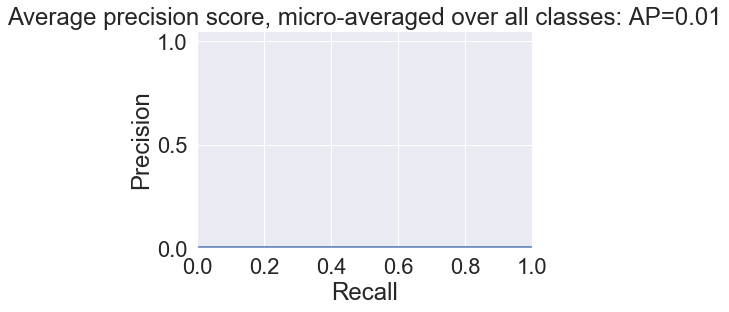

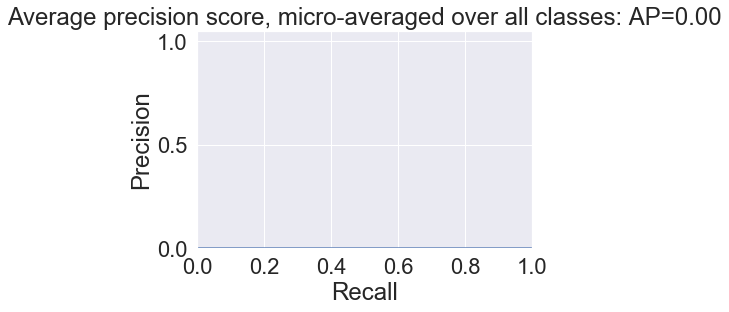

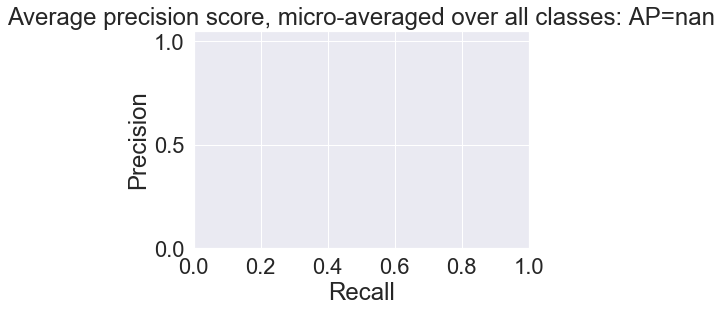

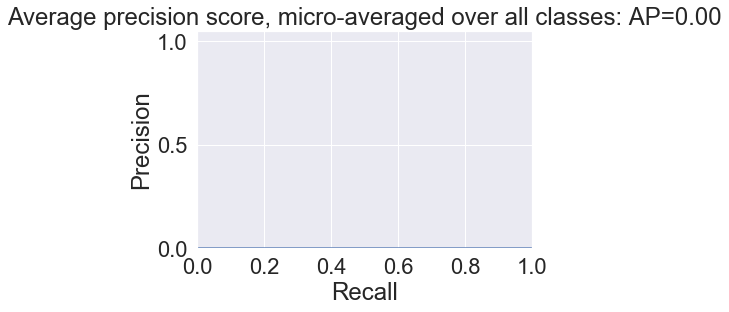

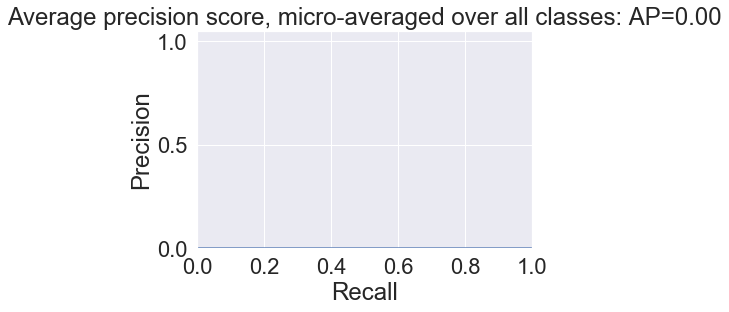

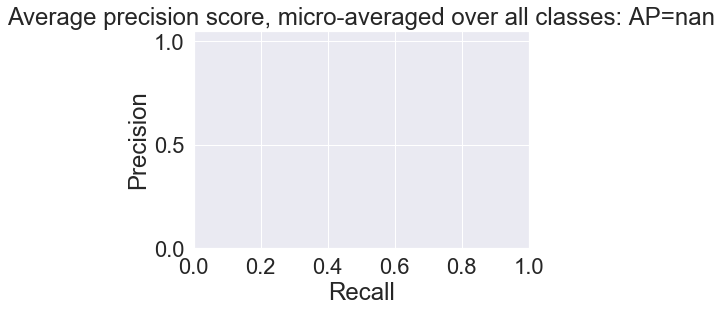

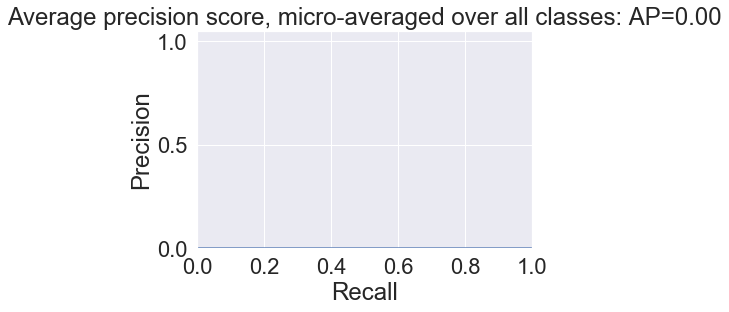

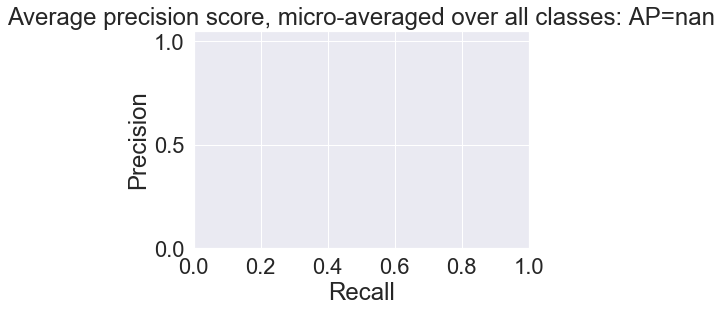

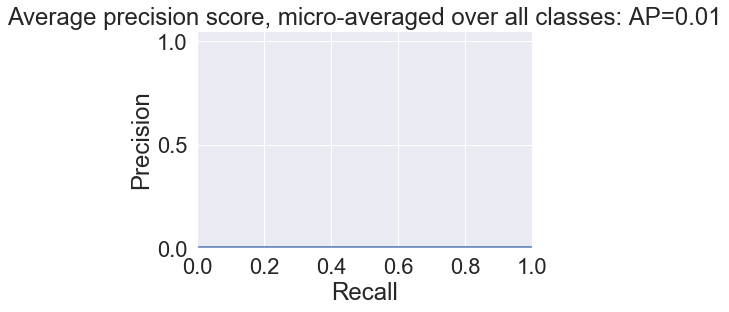

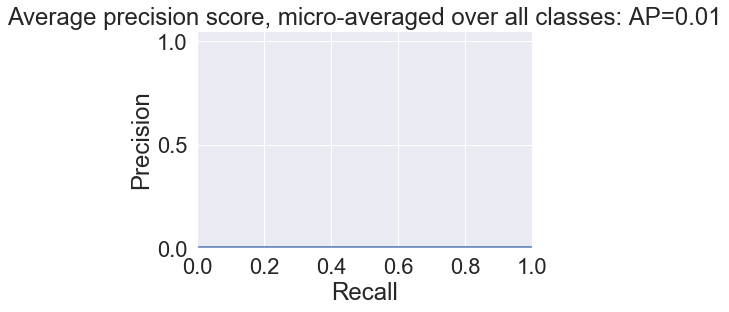

In [28]:
run_split(data_classifier_ref, test_type, confusionMatrix, modelMatrix, metrics_by_class, configurationTFIDF ,num_feature ,stop_word ,size_test)
